# TASK 2

### About Dataset

#### Task Details
**Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform. Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.**

**Analyze data and provide some trends**
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

**The Goal**

To find answers for this quastion & build Machine Learning model for predicting the rating of a movie based on features..

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'IMDb Movies India.csv'
df = pd.read_csv(path, encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14980 non-null  float64
 2   Duration  7241 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
print(f"Data Contains {df.shape[0]} Movies, {df.shape[1]} Features.")

Data Contains 15509 Movies, 10 Features.


In [5]:
print("Duplicated Rows:",df.duplicated().sum())

Duplicated Rows: 6


In [6]:
df[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,-1979.0,NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1769,Balidan,-1992.0,NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4723,First Time - Pehli Baar,-2009.0,NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,-2019.0,NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,-2019.0,118 min,Thriller,NaN,NaN,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [7]:
print("Null Values:")
df.isna().sum().sort_values(ascending=False)

Null Values:


Duration    8268
Rating      7590
Votes       7589
Actor 3     3153
Actor 2     2385
Genre       1877
Actor 1     1617
Year         529
Director     525
Name           0
dtype: int64

In [8]:
for col in df.columns:
    print(col, '->', df[col].nunique())
    print(df[col].unique())
    print('-'*50)

Name -> 13838
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
--------------------------------------------------
Year -> 102
[   nan -2019. -2021. -2010. -1997. -2005. -2008. -2012. -2014. -2004.
 -2016. -1991. -1990. -2018. -1987. -1948. -1958. -2017. -2020. -2009.
 -2002. -1993. -1946. -1994. -2007. -2013. -2003. -1998. -1979. -1951.
 -1956. -1974. -2015. -2006. -1981. -1985. -2011. -2001. -1967. -1988.
 -1995. -1959. -1996. -1970. -1976. -2000. -1999. -1973. -1968. -1943.
 -1953. -1986. -1983. -1989. -1982. -1977. -1957. -1950. -1992. -1969.
 -1975. -1947. -1972. -1971. -1935. -1978. -1960. -1944. -1963. -1940.
 -1984. -1934. -1955. -1936. -1980. -1966. -1949. -1962. -1964. -1952.
 -1933. -1942. -1939. -1954. -1945. -1961. -1965. -1938. -1941. -1931.
 -1937. -2022. -1932. -1923. -1915. -1928. -1922. -1917. -1913. -1930.
 -1926. -1914. -1924.]
--------------------------------------------------
Duration -> 183
[nan '109 min' '90

# Data Preparation

In [9]:
df = df.drop_duplicates()
print("Duplicated Rows:",df.duplicated().sum())

Duplicated Rows: 0


In [10]:
df = df.dropna(subset=['Rating'])
df['Rating'].sort_values(ascending=False)[:6]

7036     14.0
8339     10.0
5410      9.7
2563      9.6
11704     9.4
5077      9.4
Name: Rating, dtype: float64

In [11]:
df[df['Rating']==14.0]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
7036,Kabhi Ajnabi Th?(1985),NaN,"Romance, Sport",5,14.0,Vijay Singh,Poonam Dhillon,Sandeep Patil,Debashree Roy,NaN


In [12]:
df = df.drop(df[df['Rating']==14.0].index)

In [13]:
df['Year'] = np.abs(df['Year'].fillna(df['Year'].mean())).astype(int)
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int32

In [14]:
# removing ' min' part of Duration
df['Duration'] = df['Duration'].str.replace(' min','')

# replacing Nulls and 'Romance, Sport' with mode_of_duration
mode_of_duration = df['Duration'].mode()[0]
df['Duration'] = (df['Duration'].replace({np.nan:mode_of_duration,'Romance, Sport':mode_of_duration})).astype(int)
df['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int32

In [15]:
# removing ',' part of Votes
df['Votes'] = df['Votes'].str.replace(',','')

# replacing string values with mode of Votes
for val in df['Votes'].unique():
    try:
        if int(val):
            pass
    except:
        df['Votes'] = df['Votes'].replace({val:df['Votes'].mode()[0]})
        
df['Votes'] = df['Votes'].astype(int)
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [16]:
Genre = df['Genre'].str.get_dummies(sep=', ')
Genre.sum().sort_values(ascending=False)

Drama          4924
Action         2358
Romance        1780
Comedy         1609
Crime          1111
Thriller        876
Family          663
Musical         498
Adventure       386
Mystery         370
Horror          280
Fantasy         205
Documentary     143
Biography       142
History         128
Animation        73
Music            61
Sport            50
Sci-Fi           37
War              34
Western           3
News              2
dtype: int64

In [17]:
df = df.drop('Genre', axis=1).join(Genre)
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,...,0,0,0,0,1,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,...,0,1,0,0,0,0,0,0,0,0
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,...,0,0,0,0,1,0,0,0,1,0
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,...,0,0,1,0,0,0,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7918 entries, 1 to 15508
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7918 non-null   object 
 1   Year         7918 non-null   int32  
 2   Duration     7918 non-null   int32  
 3   Rating       7918 non-null   float64
 4   Votes        7918 non-null   int32  
 5   Director     7913 non-null   object 
 6   Actor 1      7793 non-null   object 
 7   Actor 2      7718 non-null   object 
 8   Actor 3      7620 non-null   object 
 9   Action       7918 non-null   int64  
 10  Adventure    7918 non-null   int64  
 11  Animation    7918 non-null   int64  
 12  Biography    7918 non-null   int64  
 13  Comedy       7918 non-null   int64  
 14  Crime        7918 non-null   int64  
 15  Documentary  7918 non-null   int64  
 16  Drama        7918 non-null   int64  
 17  Family       7918 non-null   int64  
 18  Fantasy      7918 non-null   int64  
 19  History   

# Analyze data and provide some trends

- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

**Year with best rating**

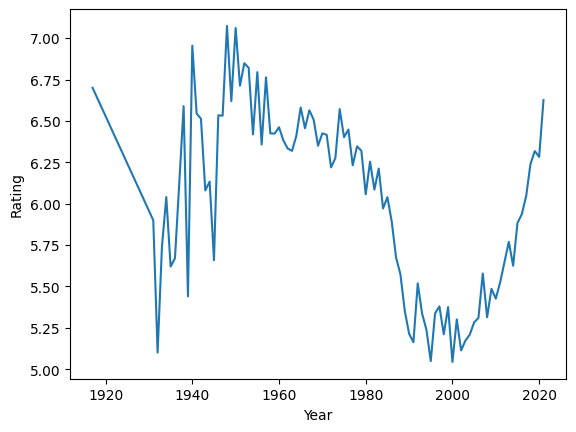

In [19]:
sns.lineplot(data=df, x='Year', y='Rating', errorbar=None)
plt.show()

**Does length of movie have any impact with the rating?**

In [20]:
bestD_rates = df.groupby('Duration')['Rating'].max().sort_values(ascending=False).iloc[:5]
print(bestD_rates)

Duration
94     10.0
79      9.7
120     9.6
93      9.4
113     9.4
Name: Rating, dtype: float64


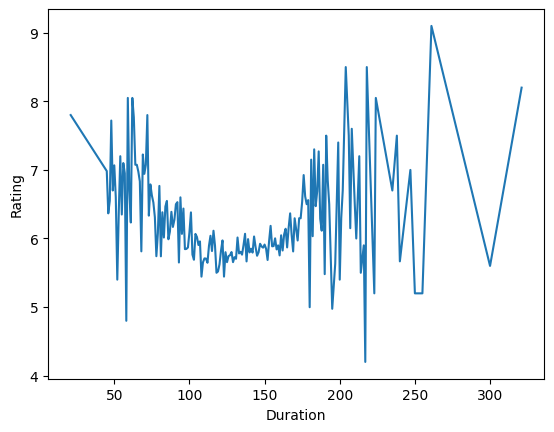

In [21]:
sns.lineplot(data=df, x='Duration', y='Rating', errorbar=None)
plt.show()

**Top 10 movies according to rating per year and overall**

In [22]:
bestY_rates = df.groupby('Year')['Rating'].max().sort_values(ascending=False).iloc[:10]
print(bestY_rates)

Year
2020    10.0
2021     9.7
2019     9.4
2017     9.4
2018     9.3
2007     9.2
2015     9.2
2011     9.1
1997     9.1
1938     9.0
Name: Rating, dtype: float64


**Number of popular movies released each year**

In [23]:
print("Popular movies with rating > 9.0")
df[df['Rating']>9.0].groupby('Year')['Rating'].count().sort_values(ascending=False)

Popular movies with rating > 9.0


Year
2021    8
2019    6
2020    6
2018    3
1997    1
2007    1
2011    1
2015    1
2017    1
Name: Rating, dtype: int64

**Counting the number of votes which movies preformed better in rating per year and overall**

In [24]:
print("Number of Votes per year when rating > 9.0")
df[df['Rating']>9.0].groupby('Year')['Votes'].sum().sort_values(ascending=False)

Number of Votes per year when rating > 9.0


Year
2020    83153
2021     4315
2019      169
2018      167
2011       99
2015       97
1997       44
2007       36
2017        5
Name: Votes, dtype: int32

**Any other trends or future prediction you may have**

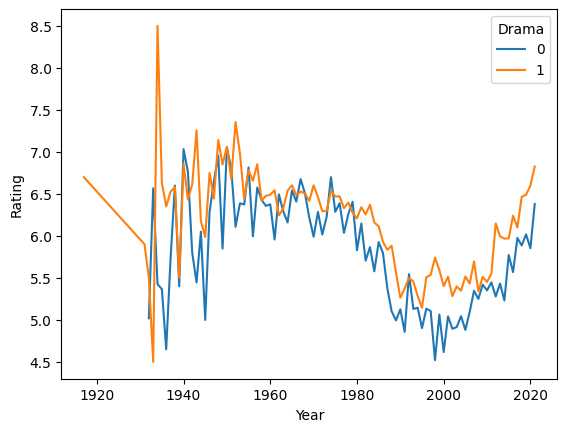

In [25]:
sns.lineplot(data=df, x='Year', y='Rating',hue='Drama', errorbar=None)
plt.show()

**Which director directed the most movies**

In [26]:
df['Director'].value_counts().sort_values(ascending=False)[:5]

Director
Mahesh Bhatt            47
David Dhawan            43
Hrishikesh Mukherjee    42
Shakti Samanta          39
Kanti Shah              38
Name: count, dtype: int64

In [27]:
df = df.drop(['Name','Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)

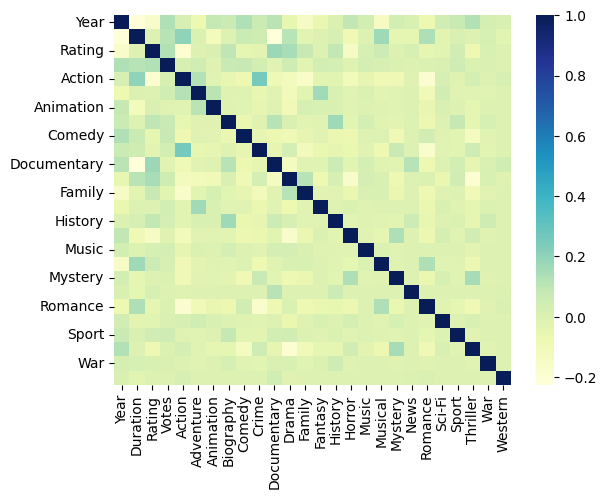

In [28]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

# Building Machine Learning Model

In [29]:
# split data and score model
from sklearn.model_selection import train_test_split, GridSearchCV

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [30]:
X = df.drop(['Rating'],axis=1)
y = df['Rating']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(f'Train Score: {regr.score(x_train, y_train)*100:.2f}%')
print(f'Test Score: {regr.score(x_test, y_test)*100:.2f}%')

Train Score: 16.39%
Test Score: 18.06%


In [31]:
param_grid = {
    'random_state': [42],
    'max_depth': [30],
    'min_samples_leaf': [2],
    'n_estimators': [500]
}

RF_regr = RandomForestRegressor()
model = GridSearchCV(estimator=RF_regr, param_grid=param_grid, cv=2).fit(x_train, y_train)

y_pred2 = model.predict(x_test)

print('Train Score:',model.score(x_train, y_train))
print('Model Score:',model.score(x_test, y_test))

model.best_estimator_

Train Score: 0.811079276439026
Model Score: 0.3514743258713615


RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

In [32]:
param_grid = {
    'random_state': [42],
    'learning_rate': [.03], #so called `eta` value
    'max_depth': [6],
    'min_child_weight': [2, 3],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500]
}

XGB_regr = XGBRegressor()
model = GridSearchCV(estimator=XGB_regr, param_grid=param_grid, cv=2, n_jobs=-1).fit(x_train, y_train)

y_pred3 = model.predict(x_test)

print('Train Score:',model.score(x_train, y_train))
print('Model Score:',model.score(x_test, y_test))

model.best_estimator_

Train Score: 0.6172093960545295
Model Score: 0.3854178147320788


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### Note:

**The Model's score is very low because incompleteness of data with features that really effect on rating, there is a lot factors that missing..**